# ‰∏Ä„ÄÅÁéØÂ¢ÉÂáÜÂ§á

Âú®ÂëΩ‰ª§Ë°å‰∏≠ÊâßË°å‰∏ãÈù¢ÁöÑÂëΩ‰ª§ÔºåÂÆâË£Ö Python ‰æùËµñÂ∫ì

pip3 install -r requirements.txt

ËæÖÂä©ÊñáÊ°£Ôºöhttps://yju67c1ngj.feishu.cn/docx/LJ1zd5sVNoQcubxVySucKAWqnfb

‰∏ãÊñáÊèêÂà∞ÁöÑ @todo È°π ÈúÄË¶ÅÊõøÊç¢‰∏∫Ëá™Â∑±ÁöÑÔºå‰∏ªË¶ÅÊòØ cookie ÂèÇÊï∞

In [3]:
import matplotlib.pyplot as plt
# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÔºåËß£ÂÜ≥ plt ÁªòÂõæ‰∏≠Êñá‰∏çÊòæÁ§∫ÈóÆÈ¢ò
plt.rcParams['font.sans-serif'] = 'Arial Unicode MS'
# Áî®‰∫éÊ≠£Â∏∏ÊòæÁ§∫Ë¥üÂè∑
plt.rcParams['axes.unicode_minus'] = False

# ‰∫å„ÄÅÁà¨Ëô´Ëé∑ÂèñÁ†¥Â±ÄÊòüÁêÉÁ≤æÂçéÊñáÁ´†

In [4]:
from urllib.parse import quote
import time
import random
import requests
from fake_useragent import UserAgent


# ‰ªéÊåáÂÆöÊòüÁêÉ urlËé∑ ÂèñÊï∞ÊçÆ
def get_data(url):
    ua = UserAgent()
    # ÊØèÊ¨°Ë∞ÉÁî®ÁîüÊàê‰∏Ä‰∏™ÈöèÊú∫ÁöÑ agentÔºåÈò≤Ê≠¢Ë¢´ÈôêÊµÅ
    user_agent = ua.random
    # @todo Ê≥®ÊÑè‰∏ãÈù¢ÁöÑcookieÂèÇÊï∞ÈúÄË¶ÅÊõøÊç¢‰∏∫‰Ω†Ëá™Â∑±ÁöÑÔºåÁôªÂΩïÁü•ËØÜÊòüÁêÉÂêéÊü•ÁúãÊé•Âè£ÁΩëÁªúËØ∑Ê±ÇÔºåÂ§çÂà∂‰øÆÊîπ‰∏ãÈù¢ÁöÑÂèÇÊï∞
    # cookie ÂåÖÂê´‰Ω†ÁöÑÁôªÂΩï‰ø°ÊÅØÔºåÂ¶ÇÊûúËøîÂõûÁä∂ÊÄÅÁ†Å 401Ôºå‰ª£Ë°® cookie ËøáÊúüÔºåÈúÄË¶ÅÊõ¥Êç¢ÊúÄÊñ∞ÁôªÂΩïÁöÑ cookie
    headers_group = {
        "accept": "application/json, text/plain, */*",
        "accept-encoding": "gzip, deflate, br",
        "accept-language": "zh-CN,zh;q=0.9",
        "cache-control": "no-cache",
        "cookie": "UM_distinctid=188126c9de5337-07a7abb9fd0331-1b525635-13c680-188126c9de61027;",
        "dnt": "1",
        "origin": "https://wx.zsxq.com",
        "pragma": "no-cache",
        "referer": "https://wx.zsxq.com/",
        "sec-ch-ua": '"Chromium";v="104", " Not A;Brand";v="99", "Google Chrome";v="104"',
        "sec-ch-ua-mobile": "?0",
        "sec-ch-ua-platform": "macOS",
        "sec-fetch-dest": "empty",
        "sec-fetch-mode": "cors",
        "sec-fetch-site": "same-site",
        "user-agent":  user_agent,
        "x-request-id": "820c80e29-2bf0-4d33-fb8d-3dc621004ad",
        "x-signature": "53998a061597cf1c91e06bd3a2f6fa7935ad2d73",
        "x-timestamp": "1698673871",
        "x-version": "2.45.0",
    }
    max_retries = 5
    for _ in range(max_retries):
        rsp = requests.get(url, headers=headers_group)
        topics = rsp.json().get('resp_data').get('topics')

        print("Ëé∑ÂèñÊï∞ÊçÆ", rsp.status_code, len(topics) if topics is not None else 0)
        if rsp.status_code == 200 and topics is not None:
            return topics
        time.sleep(5)  # Á≠âÂæÖ5ÁßíÈáçËØï

 
    return []

# Á†¥Â±ÄÊòüÁêÉÁ≤æÂçé url
url = "https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20"
next_page = get_data(url)
topics = next_page
# Â¶ÇÊûúÊúâÊï∞ÊçÆÔºåÊãâÂèñ‰∏ã‰∏ÄÈ°µ
while next_page:
    # ‰∏ä‰∏ÄÈ°µÊúÄÂêé‰∏ÄÁØáÊñáÁ´†ÁöÑÂèëË°®Êó∂Èó¥
    create_time = next_page[-1].get('create_time')
    # ÂèëË°®Êó∂Èó¥Ê†ºÂºèÂåñÔºàÁ©∫‰ΩôÂ°´ÂÖÖ 0Ôºâ
    end_time = create_time[:20]+str(int(create_time[20:23])-1).zfill(3)+create_time[23:]
    # Êó∂Èó¥Âá∫Áé∞Êï¥ÁÇπÊó∂ÈúÄË¶ÅÁâπÊÆäÂ§ÑÁêÜÔºåÂê¶Âàô‰ºöÂá∫Áé∞ -1
    if create_time[20:23] == '000':
        temp_time = datetime.datetime.strptime(create_time, "%Y-%m-%dT%H:%M:%S.%f+0800")
        temp_time += datetime.timedelta(seconds=-1)
        end_time = temp_time.strftime("%Y-%m-%dT%H:%M:%S") + '.999+0800'
    # url ÂèÇÊï∞Ê†ºÂºèÂåñ
    end_time = quote(end_time)
    # ÊãºÊé• ‰∏ã‰∏ÄÈ°µÈúÄË¶ÅÁöÑ end_time Â≠óÊÆµ
    next_url = url + '&end_time=' + end_time
    # ÈöèÊú∫Á≠âÂæÖ 10 ~ 20 s
    time.sleep(random.uniform(10, 20))
    # ËØ∑Ê±Ç‰∏ã‰∏ÄÈ°µ
    next_page = get_data(next_url)
    if next_page:
        topics = topics + next_page
        print("next_page", len(next_page), len(topics), next_url)

print(len(topics))

Ëé∑ÂèñÊï∞ÊçÆ 200 20
Ëé∑ÂèñÊï∞ÊçÆ 200 20
next_page 20 40 https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20&end_time=2023-10-25T17%3A26%3A48.002%2B0800
Ëé∑ÂèñÊï∞ÊçÆ 200 20
next_page 20 60 https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20&end_time=2023-10-09T20%3A00%3A44.352%2B0800
Ëé∑ÂèñÊï∞ÊçÆ 200 20
next_page 20 80 https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20&end_time=2023-09-22T00%3A56%3A02.621%2B0800
Ëé∑ÂèñÊï∞ÊçÆ 200 20
next_page 20 100 https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20&end_time=2023-09-09T22%3A53%3A48.955%2B0800
Ëé∑ÂèñÊï∞ÊçÆ 200 20
next_page 20 120 https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20&end_time=2023-08-17T02%3A11%3A27.261%2B0800
Ëé∑ÂèñÊï∞ÊçÆ 200 20
next_page 20 140 https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20&end_time=2023-07-25T23%3A30%3A16.564%2B0800
Ëé∑ÂèñÊï∞ÊçÆ 200 20
next_page 20 160 http

# ‰∏â„ÄÅjson Êï∞ÊçÆ ÂêåÊ≠•Âà∞Êñá‰ª∂‰∏≠

In [5]:
import json
# Serializing json
print(len(topics))
json_object = json.dumps(topics, indent=4, ensure_ascii=False)
# Writing to sample.json
with open("topics.json", "w") as outfile:
    outfile.write(json_object)

331


# Âõõ„ÄÅÊï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ

In [9]:
import pandas as pd
from  datetime import datetime
tmpArr = []
for item in topics:
    # ËøáÊª§Êó†ÊïàÁöÑÊñáÁ´†
    if 'talk' not in item:
        print("No talk", item)
        continue
    
    # ÊñáÁ´†ÂÜÖÂÆπÂàÜ‰∏§ÁßçÂΩ¢ÂºèÔºöÁ∫ØÊñáÊú¨ + ÈìæÊé•
    if 'article' not in item['talk']:        
        title = item["talk"]["text"]
        html_content = item["talk"]["text"]
        acticle_url = ""
    else:
        title = item["talk"]["article"]["title"]
        html_content = requests.get(item["talk"]["article"]["inline_article_url"]).content
        acticle_url = item["talk"]["article"]["inline_article_url"]
    tmpArr.append(
        {
            "title": title,
            "owner": item["talk"]["owner"]["name"],
            "location": item["talk"]["owner"]["location"],
            "create_time": item["create_time"],
            "readers_count": item["readers_count"],
            "likes_count": item["likes_count"],
            "article_url": acticle_url,
            "hour": datetime.strptime(item["create_time"], "%Y-%m-%dT%H:%M:%S.%f%z").hour
        }
    )
df = pd.DataFrame(tmpArr)
df.to_csv("topics.csv")
df.head()
df = df[df['owner'] != 'findyi']
print(df.shape)


No talk {'topic_id': 588114542582444, 'group': {'group_id': 15552545485212, 'name': 'AIÁ†¥Â±Ä‰ø±‰πêÈÉ®', 'type': 'pay', 'background_url': 'https://images.zsxq.com/FslG2Iw17zo1nk4F_XhCrWvxbcR7?e=1704038399&token=kIxbL07-8jAj8w1n4s9zv64FuZZNEATmlU_Vm6zD:tsqPd2LDgT-ZwGcDtvh4t4SVTmk='}, 'type': 'q&a', 'question': {'owner': {'user_id': 88285254518482, 'name': 'È£ûÊú∫Fitz', 'avatar_url': 'https://images.zsxq.com/FkMvntdSHxxZNuoGUAmpfXJX5TK8?e=1704038399&token=kIxbL07-8jAj8w1n4s9zv64FuZZNEATmlU_Vm6zD:Hi1cKOPVQshFN_uPzv6a0ylpPPM=', 'location': '‰∏äÊµ∑'}, 'questionee': {'user_id': 51544811224184, 'name': 'findyi', 'avatar_url': 'https://images.zsxq.com/FjoYYKf24IAnA-qdduT3wHfrs9KX?e=1704038399&token=kIxbL07-8jAj8w1n4s9zv64FuZZNEATmlU_Vm6zD:bk0m5aITgrVp250Z0TI5A5d7XtY=', 'description': 'Ââç360ÊäÄÊúØÊÄªÁõë„ÄÅÊãÖ‰ªªËøáÁã¨ËßíÂÖΩÂÖ¨Âè∏CTO„ÄÅËÖæËÆØTVP', 'location': 'Âåó‰∫¨'}, 'text': 'Ê¥ãÂì•Â•ΩÂëÄÔΩû\nÊàëÊúÄËøë‰∏ÄÁõ¥Âú®ÊÄùËÄÉ‰∏Ä‰∏™ÈóÆÈ¢ò‚ÄúaiÊó∂‰ª£Ôºå‰∏Ä‰∏™‰∫∫ÁöÑÊ†∏ÂøÉÁ´û‰∫âÂäõÂà∞Â∫ï‰ºöÊòØ‰ªÄ‰πàÔºü‚Ä

# ‰∫î„ÄÅÊñáÁ´†‰ΩúËÄÖÊãÜËß£

In [10]:

# ÁªüËÆ°ÊØè‰Ωç‰ΩúËÄÖÁöÑÊñáÁ´†Êï∞
author_article_counts = df['owner'].value_counts().reset_index()
author_article_counts.columns = ['author', 'article_count']
# Â±ïÁ§∫Ââç 10‰∏™ ‰ΩúËÄÖ
author_article_counts.head(10)

author  article_count
0         Â∞èÊΩò             21
1        Âê¥‰∏úÂ≠ê             14
2         ÁöÆÁâπ              9
3        Èó´Â∞èÊûó              9
4        Â∞è‰∏ÉÂßê              8
5         È±ºÁöÆ              7
6         ÂÖÉÂ≥∞              7
7        ÊÆµËÄÅÊπø              6
8         ÊΩòËææ              5
9  Á´πÂ≠ê | Ê¥ãÂì•Âä©ÁêÜ              4

# ÂÖ≠„ÄÅ‰ΩúËÄÖÊâÄÂú®ÂüéÂ∏ÇÂàÜÊûê

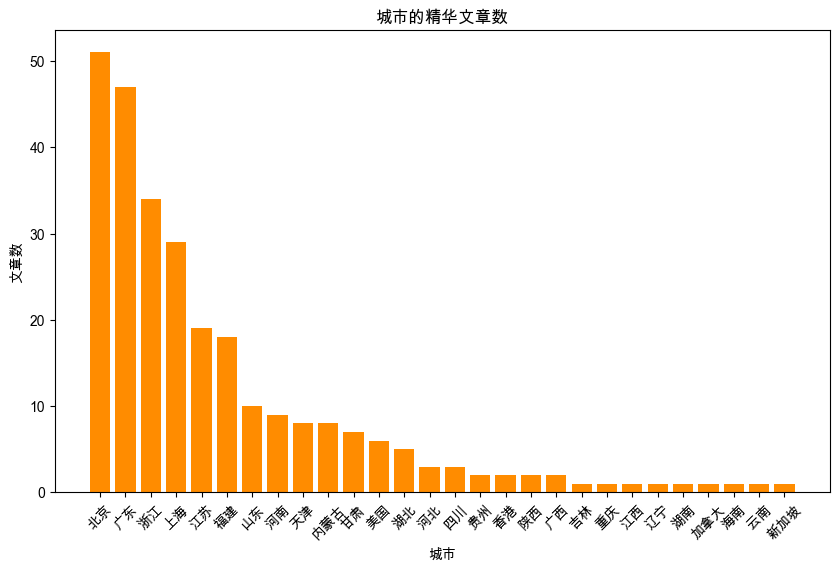

In [11]:
# Ë¶ÜÁõñ‰∫ÜÂ§öÂ∞ë‰∏™ÂüéÂ∏Ç
# ÁªüËÆ°ÊØè‰Ωç‰ΩúËÄÖÁöÑÊñáÁ´†Êï∞
metrics = df['location'].value_counts().reset_index()
metrics.columns = ['X', 'Y']

# ÁªòÂà∂Êü±Áä∂Âõæ
plt.figure(figsize=(10, 6))
plt.bar(metrics['X'], metrics['Y'], color='darkorange')
plt.xlabel('ÂüéÂ∏Ç')
plt.ylabel('ÊñáÁ´†Êï∞')
plt.title('ÂüéÂ∏ÇÁöÑÁ≤æÂçéÊñáÁ´†Êï∞')
plt.xticks(rotation=45)  # ÊóãËΩ¨ X ËΩ¥Ê†áÁ≠æÔºå‰ΩøÂÖ∂Êõ¥ÊòìËØª
plt.show()

# ‰∏É„ÄÅÊñáÁ´†ÂèëË°®Êó∂Èó¥ÂàÜÊûê

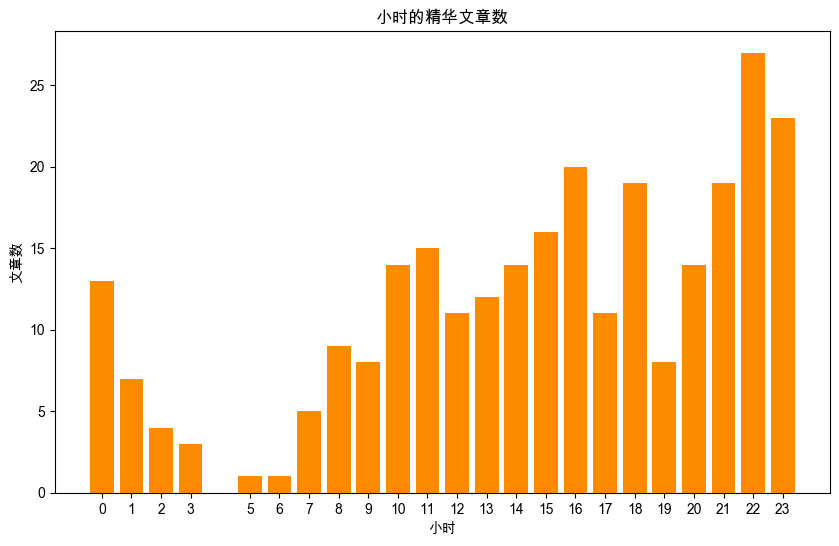

In [12]:
metrics = df['hour'].value_counts().reset_index()
metrics.columns = ['X', 'Y']

# ÁªòÂà∂Êü±Áä∂Âõæ
plt.figure(figsize=(10, 6))
metrics
plt.bar(metrics['X'], metrics['Y'], color='darkorange')
plt.xlabel('Â∞èÊó∂')
plt.ylabel('ÊñáÁ´†Êï∞')
plt.title('Â∞èÊó∂ÁöÑÁ≤æÂçéÊñáÁ´†Êï∞')
plt.xticks(metrics['X']) # ËÆæÁΩÆ x ËΩ¥ÂàªÂ∫¶ÂíåÊ†áÁ≠æ
# plt.xticks(rotation=45)  # ÊóãËΩ¨ X ËΩ¥Ê†áÁ≠æÔºå‰ΩøÂÖ∂Êõ¥ÊòìËØª
plt.show()

# ÂÖ´„ÄÅÈòÖËØªÊï∞ÂàÜÊûê

## ‰∏ÄÔºâÊü•ÁúãÊüê‰∏™‰ΩúËÄÖÁöÑÊñáÁ´†

In [13]:
df2 = df[df['article_url'] != '']
print(df.shape)
df2 = df[df['owner'] == 'Êú®Â∑ù']
print(df2.shape)

df_sorted = df2.sort_values(by="readers_count", ascending=False)
for index, row in df_sorted.iterrows():
    print(f"title: {row['title'][:30]}, owner: {row['owner']}, article_url: {row['article_url']}, {row['readers_count']}, {row['likes_count']}")

(274, 8)
(2, 8)
title: CodeGeex ÁºñÁ®ãÂ§ßÊ®°ÂûãÂ∫îÁî®Â§çÁõò, owner: Êú®Â∑ù, article_url: https://articles.zsxq.com/inline_form/id_arb464kfrkjn.html, 5845, 89
title: ÊàëÁî® AI + ÁºñÁ®ãÊãÜËß£‰∫ÜÁ†¥Â±Ä 300+ Á≤æÂçéÊñáÁ´†ÔºåÊàëÊÉäÂëÜ‰∫Ü, owner: Êú®Â∑ù, article_url: https://articles.zsxq.com/inline_form/id_wu8tqxikt3wo.html, 2079, 117


## ‰∫åÔºâËÆ°ÁÆó‰∏çÂêåÂàÜ‰ΩçÊï∞‰∏ãÁöÑÊñáÁ´†ÈòÖËØªÊï∞ÔºåÁªòÂà∂ÁÆ±Á∫øÂõæ

50 ÂàÜ‰ΩçÊï∞Ôºö6664.0
75 ÂàÜ‰ΩçÊï∞Ôºö10411.25
90 ÂàÜ‰ΩçÊï∞Ôºö12751.2
95 ÂàÜ‰ΩçÊï∞Ôºö13534.949999999988
100 ÂàÜ‰ΩçÊï∞Ôºö20783.0


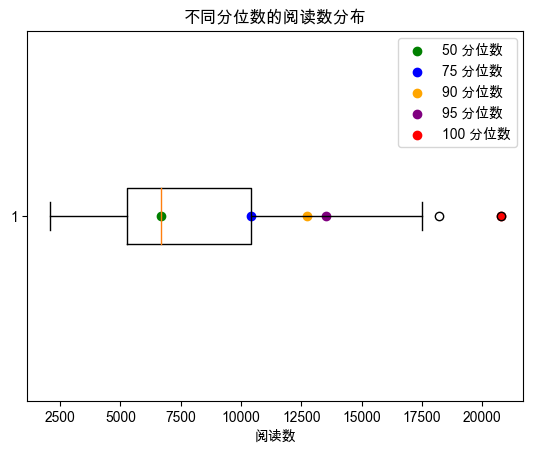

In [14]:
import matplotlib.pyplot as plt
import numpy as np

readership_data = df["readers_count"]

# ÂàõÂª∫ÁÆ±Á∫øÂõæ
# ËÆ°ÁÆó‰∏çÂêåÂàÜ‰ΩçÊï∞
percentiles = [50, 75, 90, 95, 100]
percentile_values = np.percentile(readership_data, percentiles)

# ÊâìÂç∞ÂàÜ‰ΩçÊï∞ÁöÑÂÄº
for p, value in zip(percentiles, percentile_values):
    print(f"{p} ÂàÜ‰ΩçÊï∞Ôºö{value}")

# ÁªòÂà∂ÁÆ±Á∫øÂõæ
plt.boxplot(readership_data, vert=False)

# Ê∑ªÂä†‰∏çÂêåÈ¢úËâ≤ÁöÑÂàÜ‰ΩçÊï∞Ê†áËØÜ
colors = ['green', 'blue', 'orange', 'purple', 'red']
for p, value, color in zip(percentiles, percentile_values, colors):
    plt.scatter(value, 1, color=color, marker='o', label=f"{p} ÂàÜ‰ΩçÊï∞")

# ËÆæÁΩÆÊ†áÁ≠æÂíåÊ†áÈ¢ò
plt.xlabel("ÈòÖËØªÊï∞")
plt.title("‰∏çÂêåÂàÜ‰ΩçÊï∞ÁöÑÈòÖËØªÊï∞ÂàÜÂ∏É")

# Ê∑ªÂä†Âõæ‰æã
plt.legend()

# ÊòæÁ§∫ÂõæË°®
plt.show()

## ‰∏âÔºâÁªüËÆ°‰∏çÂêåÈòÖËØªÊï∞Âå∫Èó¥ÁöÑÊñáÁ´†Êï∞ÔºåÁªòÂà∂Áõ¥ÊñπÂõæ

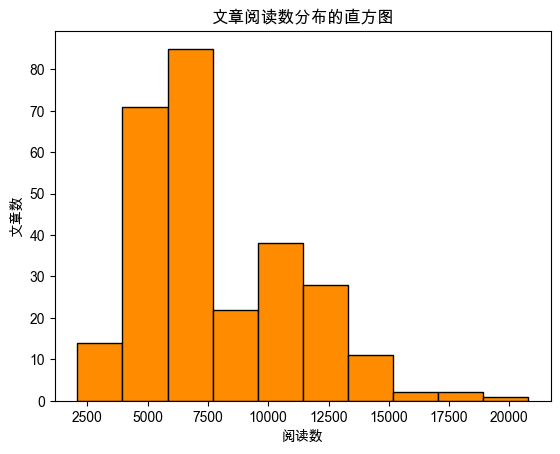

In [15]:
import matplotlib.pyplot as plt
import numpy as np

readership_data = df["readers_count"]
plt.hist(readership_data, bins=10, color='darkorange', edgecolor='k')

plt.xlabel("ÈòÖËØªÊï∞")
plt.ylabel("ÊñáÁ´†Êï∞")
plt.title("ÊñáÁ´†ÈòÖËØªÊï∞ÂàÜÂ∏ÉÁöÑÁõ¥ÊñπÂõæ")
plt.show()

## ÂõõÔºâÁªüËÆ°ÈòÖËØªÊï∞ top 10 ÁöÑÊñáÁ´†

In [16]:
df_sorted = df.sort_values(by="readers_count", ascending=False)
top_10 = df_sorted.head(10)
top_10[['title', 'owner', 'readers_count', 'article_url']]

title       owner  \
247                   0‰ª£Á†ÅÂü∫Á°ÄÂ∞èÁôΩ‰ΩøÁî®ChatGPTÂÅöÂá∫‰∏ÄÊ¨æË∞∑Ê≠åÂÖ®Â±èÊà™ÂõæÊèí‰ª∂ÁöÑÂÖ®ËøáÁ®ã          ÈòøÂº∫   
244                                  Â¶Ç‰ΩïÂà©Áî® ChatGPT ËæÖÂä©ÂÜô‰Ωú         Èó´Â∞èÊûó   
321                                  Á¨¨‰∏âËØæ-Â∏∏Áî®ÁöÑAIÂ∫îÁî®Ôºà100Ê¨æÔºâ  ÁéãÂº∫@ZelinAI   
245                     Â¶Ç‰ΩïÁî®ChatGPTÔºå ÊØèÂ§©Ëá™Âä®ÊâπÈáè‰∫ßÂá∫100+Êù°ÁàÜÊ¨æÁü≠ËßÜÈ¢ë        üçÄÂàòÈ©¥üí•   
316              AI Âà∞‰∫Üiphone Êó∂ÂàªÔºåÁé∞Âú®Âú®AIÈ¢ÜÂüüÂ≠¶‰π†‰∏ÄÂπ¥ÔºåÁõ∏ÂΩì‰∫éÂÖ∂‰ªñË°å‰∏öÊ∑∑ÂçÅÂπ¥         Âê¥‰∏ñÊò•   
296                                          ÈòøÈáåÈÄö‰πâÂçÉÈóÆËØïÁé©~          È±ºÁöÆ   
280               ‰ΩøÁî®AIÔºåÂÅöÊäñÈü≥Êº´ÁîªÁü≠ËßÜÈ¢ëÔºå4‰∏™‰∫∫2Â§©ÁöÑÂ∑•‰ΩúÈáèÔºå1‰∫∫‰ªÖÈúÄ5Â∞èÊó∂Âç≥ÂèØÂÆåÊàêÔºÅ      ËõãËß£Âàõ‰∏öËõãËõã   
241  Â¶Ç‰ΩïÁî®Â•ΩChatGPTÔºå10ÂÄçÊèêÂçáËæìÂá∫ÊïàÊûúüéâ\n\nÂ§ßÂÆ∂Â•ΩÔºåÊàëÊòØÊΩòËææ„ÄÇ\n\n‰πãÂâçÁõ¥Êí≠ËøûÈ∫¶Ê¥ã...          ÊΩòËææ   
255  <e type="hashtag" hid="28885111111551" title="...          È±ºÁöÆ   
301                              ÂàÜ‰∫´‰∏Ä‰∏ãÊàëÊòØÂ¶Ç‰ΩïÁî®AIÂä©ÊâãÊù•ÊèêÂçáÂ∑•‰ΩúÊïàÁéáÁöÑ  ÁéãÂº∫@ZelinAI   

     readers_count                                        article_url  
247          20783  https://articles.zsxq.com/inline_form/id_grll0...  
244          18195  https://articles.zsxq.com/inline_form/id_9xwa8...  
321          17508  https://articles.zsxq.com/inline_form/id_g7vpi...  
245          15976  https://articles.zsxq.com/inline_form/id_e74ag...  
316          15604                                                     
296          14805  https://articles.zsxq.com/inline_form/id_1orqj...  
280          14583  https://articles.zsxq.com/inline_form/id_4kdt0...  
241          14432                                                     
255          14244                                                     
301          14239  https://articles.zsxq.com/inline_form/id_zwopk...

# ‰πù„ÄÅÁÇπËµûÊï∞ÂàÜÊûê

## ‰∫åÔºâËÆ°ÁÆó‰∏çÂêåÂàÜ‰ΩçÊï∞‰∏ãÁöÑÊñáÁ´†ÁÇπËµûÊï∞ÔºåÁªòÂà∂ÁÆ±Á∫øÂõæ

50 ÂàÜ‰ΩçÊï∞Ôºö151.0
75 ÂàÜ‰ΩçÊï∞Ôºö213.0
90 ÂàÜ‰ΩçÊï∞Ôºö290.80000000000007
95 ÂàÜ‰ΩçÊï∞Ôºö320.34999999999997
100 ÂàÜ‰ΩçÊï∞Ôºö523.0


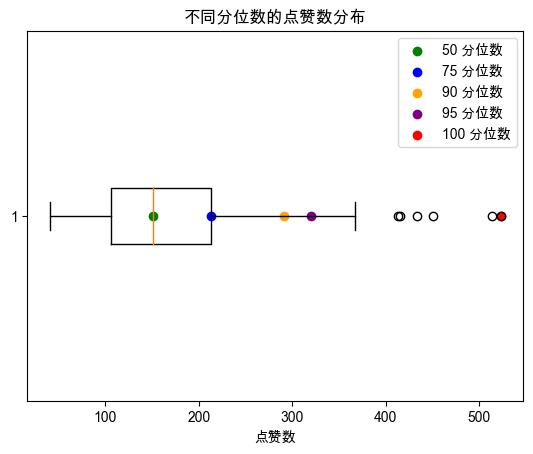

In [17]:

readership_data = df["likes_count"]
# ÂàõÂª∫ÁÆ±Á∫øÂõæ
# ËÆ°ÁÆó‰∏çÂêåÂàÜ‰ΩçÊï∞
percentiles = [50, 75, 90, 95, 100]
percentile_values = np.percentile(readership_data, percentiles)

# ÊâìÂç∞ÂàÜ‰ΩçÊï∞ÁöÑÂÄº
for p, value in zip(percentiles, percentile_values):
    print(f"{p} ÂàÜ‰ΩçÊï∞Ôºö{value}")

# ÁªòÂà∂ÁÆ±Á∫øÂõæ
plt.boxplot(readership_data, vert=False)

# Ê∑ªÂä†‰∏çÂêåÈ¢úËâ≤ÁöÑÂàÜ‰ΩçÊï∞Ê†áËØÜ
colors = ['green', 'blue', 'orange', 'purple', 'red']
for p, value, color in zip(percentiles, percentile_values, colors):
    plt.scatter(value, 1, color=color, marker='o', label=f"{p} ÂàÜ‰ΩçÊï∞")

# ËÆæÁΩÆÊ†áÁ≠æÂíåÊ†áÈ¢ò
plt.xlabel("ÁÇπËµûÊï∞")
plt.title("‰∏çÂêåÂàÜ‰ΩçÊï∞ÁöÑÁÇπËµûÊï∞ÂàÜÂ∏É")

# Ê∑ªÂä†Âõæ‰æã
plt.legend()

# ÊòæÁ§∫ÂõæË°®
plt.show()

## ‰∏âÔºâÁªüËÆ°‰∏çÂêåÁÇπËµûÊï∞Âå∫Èó¥ÁöÑÊñáÁ´†Êï∞ÔºåÁªòÂà∂Áõ¥ÊñπÂõæ

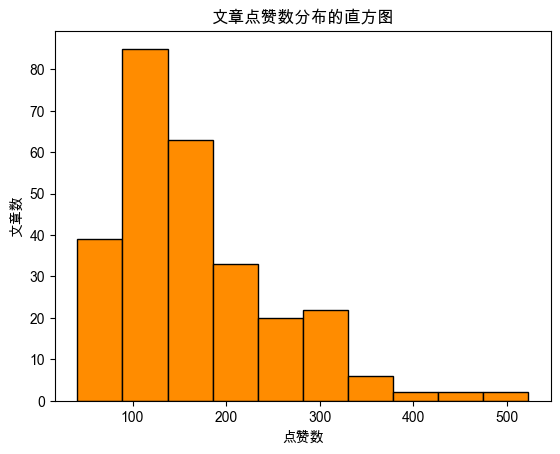

In [19]:
import matplotlib.pyplot as plt

readership_data = df["likes_count"]
plt.hist(readership_data, bins=10, color='darkorange', edgecolor='k')

plt.xlabel("ÁÇπËµûÊï∞")
plt.ylabel("ÊñáÁ´†Êï∞")
plt.title("ÊñáÁ´†ÁÇπËµûÊï∞ÂàÜÂ∏ÉÁöÑÁõ¥ÊñπÂõæ")
plt.show()

## ÂõõÔºâÁªüËÆ°ÁÇπËµûÊï∞ top 10 ÁöÑÊñáÁ´†

In [20]:
df_sorted = df.sort_values(by="likes_count", ascending=False)
top_10 = df_sorted.head(10)
top_10[['title', 'owner', 'likes_count', 'article_url']]

title       owner  \
244                                  Â¶Ç‰ΩïÂà©Áî® ChatGPT ËæÖÂä©ÂÜô‰Ωú         Èó´Â∞èÊûó   
241  Â¶Ç‰ΩïÁî®Â•ΩChatGPTÔºå10ÂÄçÊèêÂçáËæìÂá∫ÊïàÊûúüéâ\n\nÂ§ßÂÆ∂Â•ΩÔºåÊàëÊòØÊΩòËææ„ÄÇ\n\n‰πãÂâçÁõ¥Êí≠ËøûÈ∫¶Ê¥ã...          ÊΩòËææ   
196  ÁàÜËÇù10Â§©ÔºåË∂ÖÁ∫ßËØ¶ÁªÜËøõÈò∂SDÊïôÁ®ã ! ÔºÅÔºÅ\nÂ§ßÂÆ∂Â•ΩÊàëÊòØÊµ¶ÁùøÔºå‰∏ÄÂêçÂ§ß‰∫åÂú®Ê†°ÁîüÔºõSDÁªòÁîªÁÉ≠Áà±ËÄÖ...          Êó†ÂøÜ   
247                   0‰ª£Á†ÅÂü∫Á°ÄÂ∞èÁôΩ‰ΩøÁî®ChatGPTÂÅöÂá∫‰∏ÄÊ¨æË∞∑Ê≠åÂÖ®Â±èÊà™ÂõæÊèí‰ª∂ÁöÑÂÖ®ËøáÁ®ã          ÈòøÂº∫   
251                      ÊàëÂÅöÁöÑAIÂæãÊâÄÔºö‰∏ç‰ªÖÂæãÂ∏àËá™Âèë‰º†Êí≠ÔºåÁ´üÁÑ∂ËøòÂê∏Âºï‰∫ÜÂ§ß‰Ω¨ÁéãÂ∞èÂ∑ùÔºü       Âè∞È£é-2Âè∑   
245                     Â¶Ç‰ΩïÁî®ChatGPTÔºå ÊØèÂ§©Ëá™Âä®ÊâπÈáè‰∫ßÂá∫100+Êù°ÁàÜÊ¨æÁü≠ËßÜÈ¢ë        üçÄÂàòÈ©¥üí•   
201  „Ää0ÊàêÊú¨Êó•ÂÖ•1000+Â∞èÁ∫¢‰π¶ÂçñÂ§¥ÂÉèËµöÈí±Ê°à‰æãÂê´ÂºÄÂ∫óÊµÅÁ®ãÔºÅ„Äã\nÂ§ßÂÆ∂Â•ΩÔºåÊàëÊòØËâæÂÖãÔºåÊàëÂèàÊù•‰∫Ü„ÄÇÂè™ÂàÜ...          ËâæÂÖã   
281                               4‰∏™ÂÖ¨Âºè8‰∏™Ê°à‰æãÂ≠¶‰ºö‰∏échatGPTÂØπËØù  ÊòüÁêÉÂä©ÁêÜ-matao   
239                                    ÁªôÈÄÅÊØè‰∏Ä‰∏™AIÂàõ‰∏öËÄÖÁöÑÈÅøÂùëÊåáÂçó        Âè´ÊàëÂ≥∞ÂÖÑ   
192  ÊàëÂú®‰ªäÊó•Â§¥Êù°ÔºåÁî®AIÂÜôÁ®øÂèòÁé∞Ôºå3ÂàÜÈíüÂá∫‰∏ÄÁØáÔºåÊî∂Áõä1,195.26ÂÖÉÔºåÂàÜ‰∫´ÊñπÊ≥ï\n\nÊÉÖÊÑüÁ±ªÊñá...          Ë¥∫Áøî   

     likes_count                                        article_url  
244          523  https://articles.zsxq.com/inline_form/id_9xwa8...  
241          513                                                     
196          450                                                     
247          433  https://articles.zsxq.com/inline_form/id_grll0...  
251          415  https://articles.zsxq.com/inline_form/id_oug13...  
245          413  https://articles.zsxq.com/inline_form/id_e74ag...  
201          367                                                     
281          362  https://articles.zsxq.com/inline_form/id_jlxv2...  
239          349  https://articles.zsxq.com/inline_form/id_02dga...  
192          348

# ÂçÅ„ÄÅÂÖ≥ÈîÆËØçÊãÜËß£

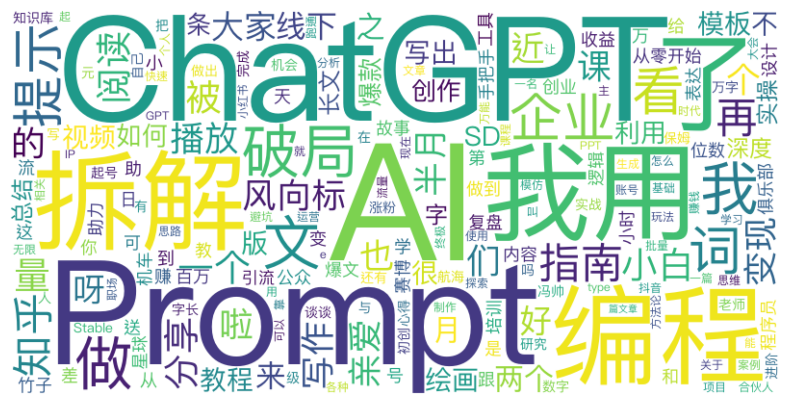

In [22]:
import jieba
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ÂáÜÂ§áÊñáÊú¨Êï∞ÊçÆ
words = []
for index, row in df.iterrows():
    title = row.title[:24]
    keywords = jieba.cut(title)
    # print(title, " ".join(keywords))
    for item in keywords:
        words.append(item)
# ‰ΩøÁî®CounterÁªüËÆ°ÂÖÉÁ¥†Âá∫Áé∞ÁöÑÊ¨°Êï∞
element_counts = Counter(words)

# ÊèêÂèñÂá∫Áé∞Ê¨°Êï∞‰∏∫2Ê¨°ÊàñÊõ¥Â§öÁöÑÂÖÉÁ¥†
result = [element for element, count in element_counts.items() if count >= 2]
text = " ".join(result)

# @todo ‰øÆÊîπ‰∏≠ÊñáÂ≠ó‰ΩìÊñá‰ª∂Ë∑ØÂæÑÔºåÂàõÂª∫ËØç‰∫ëÂØπË±°Âπ∂ÁîüÊàêËØç‰∫ëÂõæÂÉè
font_path = "../fonts/PingFang.ttc"
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text)

# ÊòæÁ§∫ËØç‰∫ëÂõæÂÉè
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ÈöêËóèÂùêÊ†áËΩ¥
plt.show()